<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head(10)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


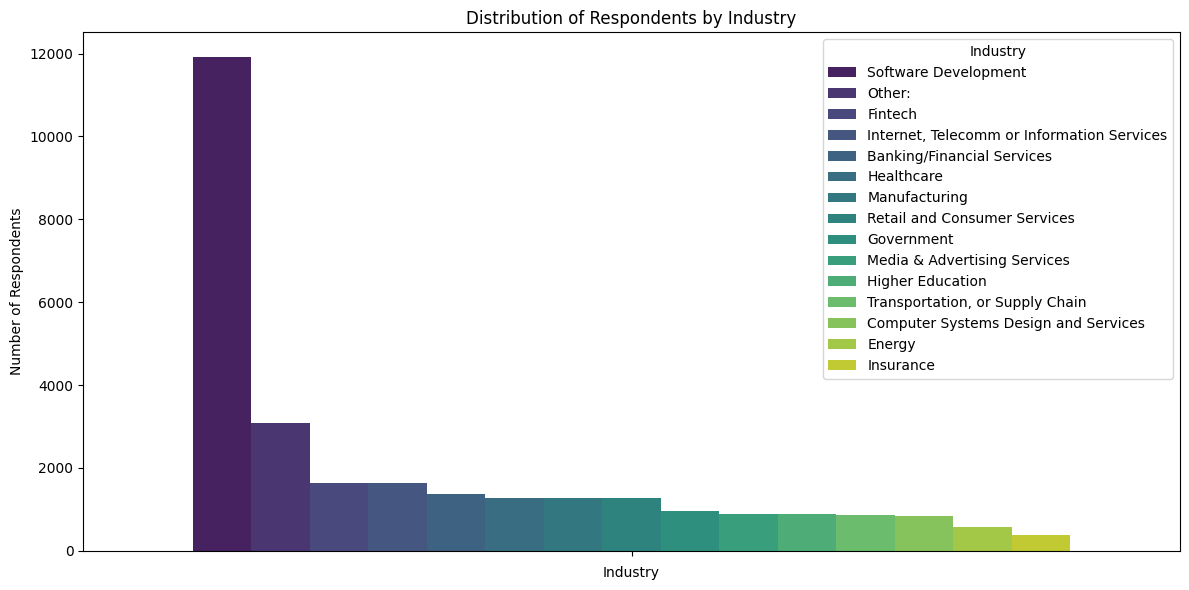

In [4]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called df
# and the industry column is named 'Industry'

# Count respondents per industry
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12,6))
sns.barplot(hue=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
import pandas as pd

# Assuming your DataFrame is named df and compensation column is 'ConvertedCompYearly'

# Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: {mean_comp}")
print(f"Median Compensation: {median_comp}")
print(f"Standard Deviation: {std_comp}")

# Define threshold for high compensation (mean + 3*std)
threshold = mean_comp + 3 * std_comp

# Identify respondents with compensation exceeding the threshold
high_comp_respondents = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of respondents with extremely high compensation: {high_comp_respondents.shape[0]}")

# Optionally, display these respondents
high_comp_respondents.head()

Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation: 186756.97308629757
Number of respondents with extremely high compensation: 89


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of outliers: 978


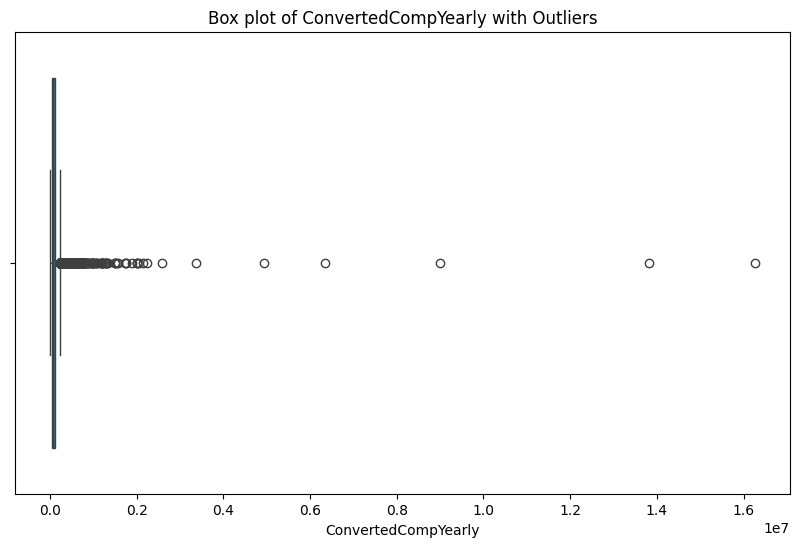

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and compensation column is 'ConvertedCompYearly'

# Calculate Q1 and Q3
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Visualize with a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box plot of ConvertedCompYearly with Outliers')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
df_new = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print(df_new.shape)

(22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


ResponseId            NaN
CompTotal             NaN
WorkExp               NaN
JobSatPoints_1        NaN
JobSatPoints_4        NaN
JobSatPoints_5        NaN
JobSatPoints_6        NaN
JobSatPoints_7        NaN
JobSatPoints_8        NaN
JobSatPoints_9        NaN
JobSatPoints_10       NaN
JobSatPoints_11       NaN
ConvertedCompYearly   NaN
JobSat                NaN
Age_numeric           NaN
Name: Age_numeric, dtype: float64


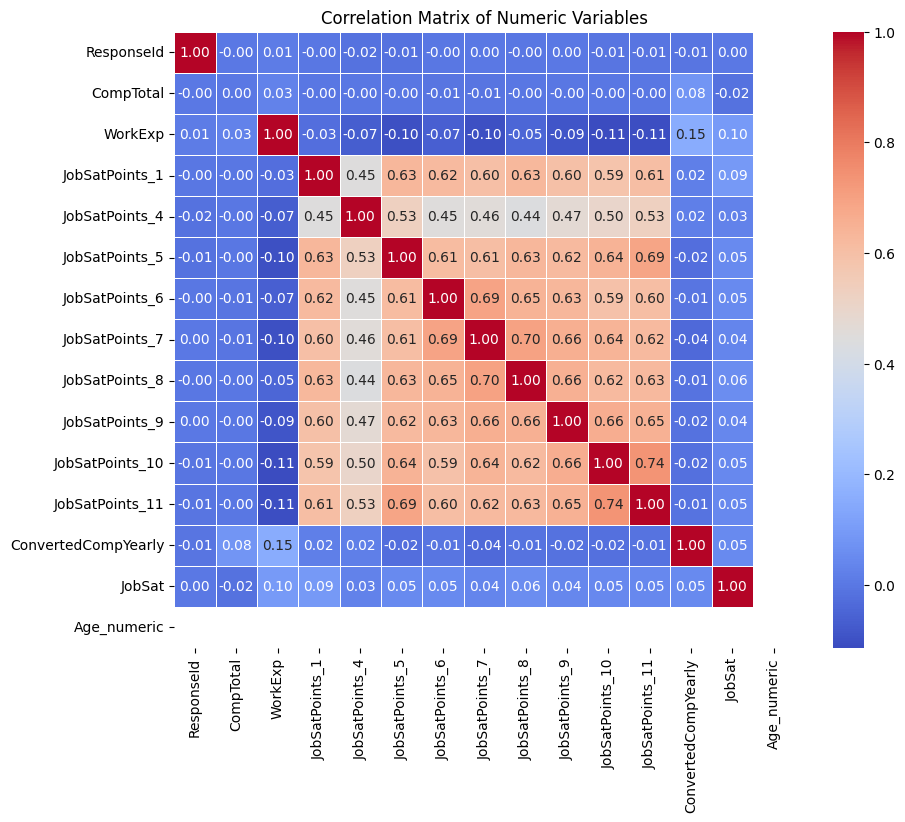

In [9]:
##Write your code here
# Example mapping for age ranges to approximate numeric values
age_mapping = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)
# Select numeric columns (including the new Age_numeric)
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Extract correlations with Age_numeric
age_corr = corr_matrix['Age_numeric'].sort_values(ascending=False)
print(age_corr)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
